In [1]:
import pandas as pd
lien ="tableau_coeff.xlsx"
df = pd.read_excel(lien)

In [3]:
df

,Prix_de_vente,min,max,coeff,Unnamed: 4,Unnamed: 5
0,<20 000,0,20000,6500.000,NaN,NaN
1,20 000 - 30 000,20001,30000,7000.000,NaN,NaN
2,30 001 - 40 000,30001,40000,8500.000,NaN,NaN
3,40 001 - 50 000,40001,50000,0.145,NaN,NaN
4,50 001 - 60 000,50001,60000,0.130,NaN,NaN
5,60 001 - 70 000,60001,70000,0.115,NaN,NaN
6,70 001 - 90 000,70001,90000,0.110,NaN,NaN
7,90 001 - 120 000,90001,120000,0.095,NaN,NaN
8,120 001 - 150 000,120001,150000,0.090,NaN,NaN
9,150 001 - 180 000,150001,180000,0.085,NaN,NaN


In [28]:
# Fonction de calcul
def prix_nv_c(prix_net_vendeur):
    if prix_net_vendeur : 
        for i in range(2, len(df)):
            if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
                coeff_temp = df['coeff'][i]
                prix_vente_temp = prix_net_vendeur / (1 - df['coeff'][i])
                if prix_net_vendeur / (1 - df['coeff'][i]) >= df['min'][i+1]:
                    prix_vente = prix_net_vendeur / ( 1 - df['coeff'][i+1])
                    coeff = df['coeff'][i+1]
                    return coeff, prix_vente
                else:
                    return coeff_temp, prix_vente_temp
    else : exit

def prix_nv_f(prix_net_vendeur): 
    if prix_net_vendeur : 
        for i in range(0, 2):
            if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
                fixe_temp = df['coeff'][i]
                prix_vente_temp = prix_net_vendeur + fixe_temp
                if prix_net_vendeur + fixe_temp >= df['min'][i+1]:
                    prix_vente = prix_net_vendeur + df['coeff'][i+1]
                    coeff = df['coeff'][i+1]
                    return coeff, prix_vente
                else:
                    return fixe_temp, prix_vente_temp
        if prix_net_vendeur >= df['min'][2] and prix_net_vendeur <= df['max'][2]: 
            coeff_temp = df['coeff'][2]
            prix_vente_temp = prix_net_vendeur + coeff_temp
            if prix_net_vendeur + coeff_temp >= df['min'][3]:
                    prix_vente = prix_net_vendeur / (1 - df['coeff'][3])
                    coeff = df['coeff'][3]
                    return coeff, prix_vente
            return coeff_temp, prix_vente_temp
    else : exit

def calcul_frais(Coeff, prix_vente):
    if prix_vente <= 40_000 :
        frais = prix_vente + Coeff
        return frais
    else :
        frais = prix_vente * Coeff
        return frais





In [24]:
print(prix_nv_f(31502))

(np.float64(0.145), np.float64(36844.444444444445))


In [27]:
print(prix_nv_c(310002))



(np.float64(0.07), np.float64(333335.48387096776))


In [ ]:
prix_net_vendeur = 5000
if prix_net_vendeur : 
    prix_net_vendeur = float(prix_net_vendeur)
    print(prix_net_vendeur)
    for i in range(0,3):
        if prix_net_vendeur > df['min'][i] and prix_net_vendeur <= df['max'][i] : 
            fixe = df['coeff'][i]
            print(fixe)
            prix_vente_temp =  prix_net_vendeur + fixe

    for i in range(3, len(df)):
        if prix_net_vendeur > df['min'][i] and prix_net_vendeur <= df['max'][i]:
            coeff_temp = df['coeff'][i]
            prix_vente_temp = prix_net_vendeur / (1 - df['coeff'][i])
            if prix_net_vendeur + (prix_net_vendeur * df['coeff'][i]) > df['min'][i+1]:
                prix_vente = prix_net_vendeur / ( 1 - df['coeff'][i+1])
                coeff = df['coeff'][i+1]
            


5000.0
6500.0
nope


In [11]:
df_analyse

,Prix net vendeur,Coeff selectionne,Prix de vente,Frais,prix_coeff_lim
0,50000,0.13,5.747126e+04,7471.264368,True
1,50010,0.13,5.748276e+04,7472.758621,False
2,50020,0.13,5.749425e+04,7474.252874,False
3,50030,0.13,5.750575e+04,7475.747126,False
4,50040,0.13,5.751724e+04,7477.241379,False
...,...,...,...,...,...
144995,1499950,0.05,1.578895e+06,78944.736842,False
144996,1499960,0.05,1.578905e+06,78945.263158,False
144997,1499970,0.05,1.578916e+06,78945.789474,False
144998,1499980,0.05,1.578926e+06,78946.315789,False


limites net vendeur :  [10000, 13501, 23001, 40001, 42751, 52201, 61951, 80101, 108601, 136501, 164701, 211601, 277501, 372001, 467501, 940001, 1417501]
limites prix vente :  [16500.0, 20501.0, 31501.0, 46784.79532163743, 49139.08045977011, 58984.180790960454, 69607.86516853933, 88509.39226519337, 119341.75824175823, 149181.42076502732, 179022.8260869565, 228757.83783783784, 298388.17204301077, 397862.0320855615, 497341.4893617022, 994710.0529100529, 1492106.3157894737]
[-6500.0, -7000.0, -8500.0, -6783.79532163743, -6388.0804597701135, -6783.180790960454, -7656.865168539327, -8408.392265193368, -10740.75824175823, -12680.420765027317, -14321.826086956513, -17156.83783783784, -20887.172043010767, -25861.032085561485, -29840.489361702173, -54709.05291005294, -74605.31578947371]


/Users/remybordes/Documents/mon_projet/Calcul prix net vendeur/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/remybordes/Documents/mon_projet/Calcul prix net vendeur/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


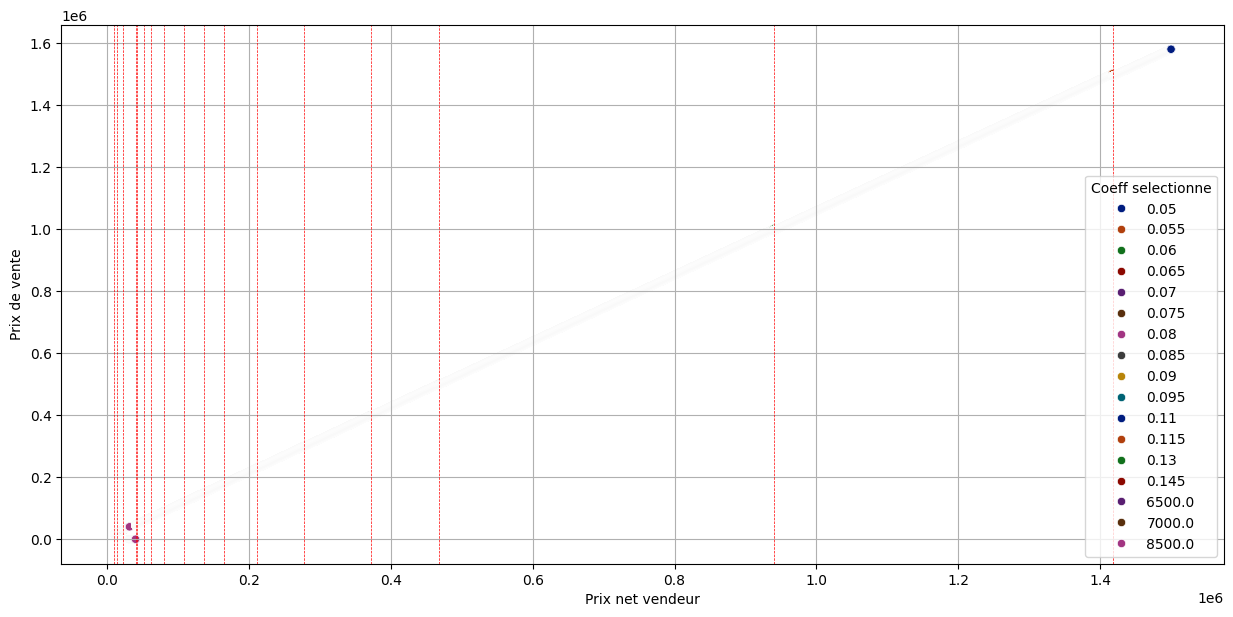

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []
coeff_lim_lst_n = []
coeff_lim_lst_v = []

for i in range(10_000,1_500_000, 1):
    if i <= 31500 :
        Prix_net_vendeur.append(i)
        Coeff_selectionne.append(prix_nv_f(i)[0])
        Prix_de_vente.append(prix_nv_f(i)[1])
    else : 
        Prix_net_vendeur.append(i)
        Coeff_selectionne.append(prix_nv_c(i)[0])
        Prix_de_vente.append(prix_nv_c(i)[1])

df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente,
})

#Calcul de la colonne frais
df_analyse['Frais'] = df_analyse.apply(lambda row : calcul_frais(row['Coeff selectionne'], row['Prix de vente']), axis=1)


#detection du changement de coeff
df_analyse['prix_coeff_lim'] = df_analyse['Coeff selectionne'].ne(df_analyse['Coeff selectionne'].shift(1))

for idx, row in df_analyse.iterrows() :
    if row['prix_coeff_lim'] :
        #print(row['Prix net vendeur'])
        coeff_lim_lst_n.append(row['Prix net vendeur'])
        coeff_lim_lst_v.append(row['Prix de vente'])


plt.figure(figsize=(15,7))
for seuil_n in coeff_lim_lst_n:
    plt.axvline(x=seuil_n, color='red', linestyle='--', linewidth=.5)
#for seuil_v in coeff_lim_lst_v:
    #plt.axhline(y=seuil_v, color='red', linestyle='--', linewidth=1)
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )
#plt.xlim(70000, 85000)
#plt.ylim(40000, 100_000)
plt.grid(True)

print(f"limites net vendeur : ",coeff_lim_lst_n)
print("limites prix vente : ", coeff_lim_lst_v)

diff_lst = [a - b for a, b in zip(coeff_lim_lst_n, coeff_lim_lst_v)]

print(diff_lst)

limites net vendeur :  [10000, 13501, 23001, 40001, 42751, 52201, 61951, 80101, 108601, 136501, 164701, 211601, 277501, 372001, 467501, 940001, 1417501]
limites prix vente :  [16500.0, 20501.0, 31501.0, 46784.79532163743, 49139.08045977011, 58984.180790960454, 69607.86516853933, 88509.39226519337, 119341.75824175823, 149181.42076502732, 179022.8260869565, 228757.83783783784, 298388.17204301077, 397862.0320855615, 497341.4893617022, 994710.0529100529, 1492106.3157894737]
[-6500.0, -7000.0, -8500.0, -6783.79532163743, -6388.0804597701135, -6783.180790960454, -7656.865168539327, -8408.392265193368, -10740.75824175823, -12680.420765027317, -14321.826086956513, -17156.83783783784, -20887.172043010767, -25861.032085561485, -29840.489361702173, -54709.05291005294, -74605.31578947371]


/Users/remybordes/Documents/mon_projet/Calcul prix net vendeur/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/remybordes/Documents/mon_projet/Calcul prix net vendeur/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


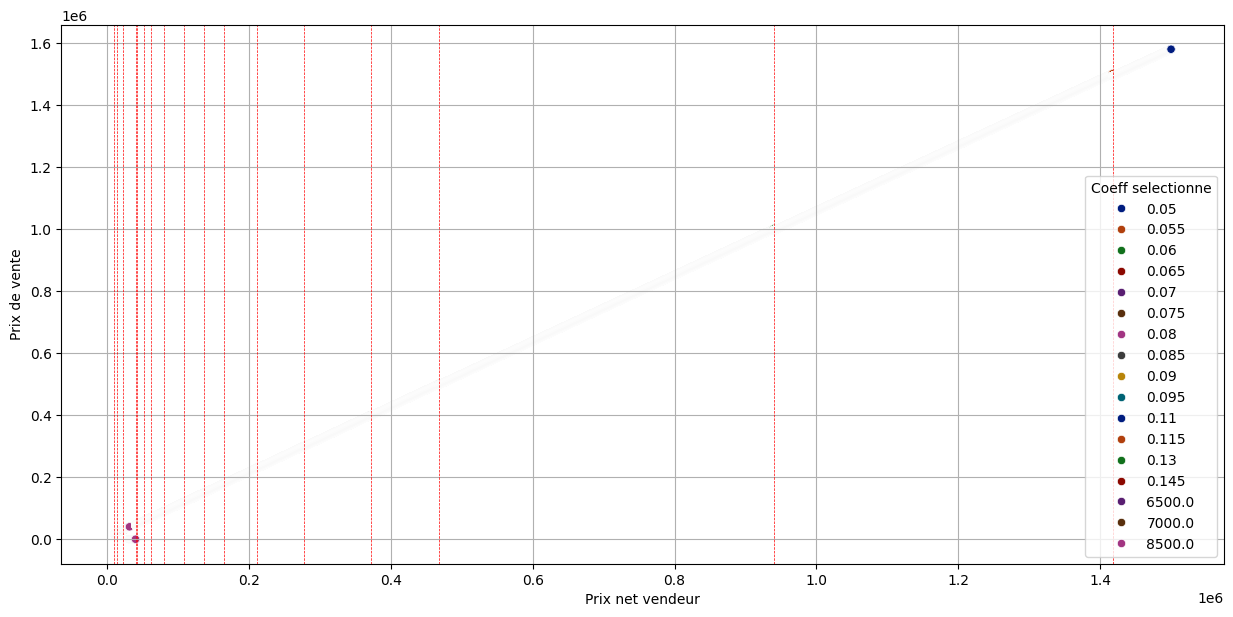

In [31]:
plt.figure(figsize=(15,7))
for seuil_n in coeff_lim_lst_n:
    plt.axvline(x=seuil_n, color='red', linestyle='--', linewidth=.5)
#for seuil_v in coeff_lim_lst_v:
    #plt.axhline(y=seuil_v, color='red', linestyle='--', linewidth=1)
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )
#plt.xlim(70000, 85000)
#plt.ylim(40000, 100_000)
plt.grid(True)

print(f"limites net vendeur : ",coeff_lim_lst_n)
print("limites prix vente : ", coeff_lim_lst_v)

diff_lst = [a - b for a, b in zip(coeff_lim_lst_n, coeff_lim_lst_v)]

print(diff_lst)

In [48]:
df_analyse['Frais']



0        7471.264368
1        7620.689655
2        7770.114943
3        6887.005650
4        7016.949153
            ...     
1445    78684.210526
1446    78736.842105
1447    78789.473684
1448    78842.105263
1449    78894.736842
Name: Frais, Length: 1450, dtype: float64

/var/folders/w7/mwhn41wd4133mpd3qmk0b4lh0000gn/T/ipykernel_74640/3584214300.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/remybordes/Documents/mon_projet/Calcul prix net vendeur/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


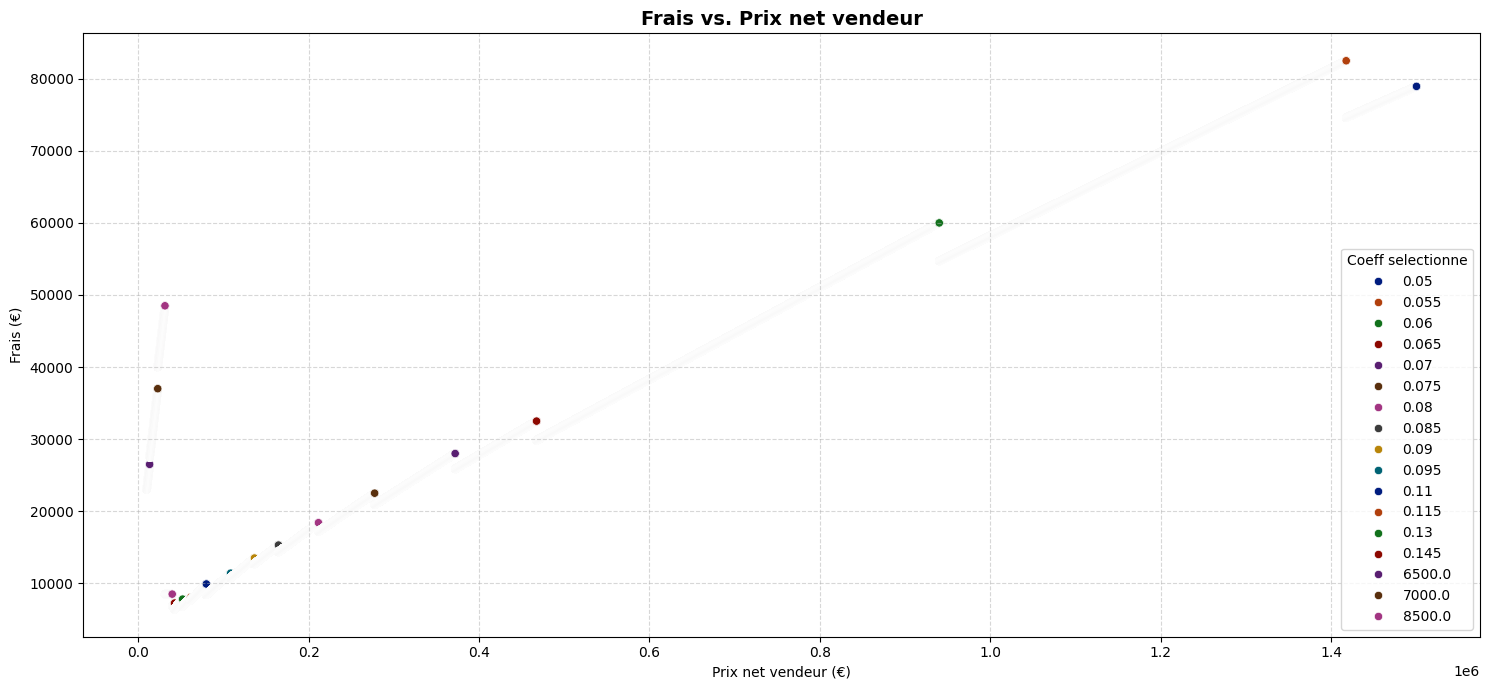

In [32]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_analyse, x = 'Prix net vendeur', y= 'Frais', hue='Coeff selectionne', palette='dark')
plt.title('Frais vs. Prix net vendeur', fontsize=14, weight='bold')
plt.xlabel('Prix net vendeur (€)')
plt.ylabel('Frais (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

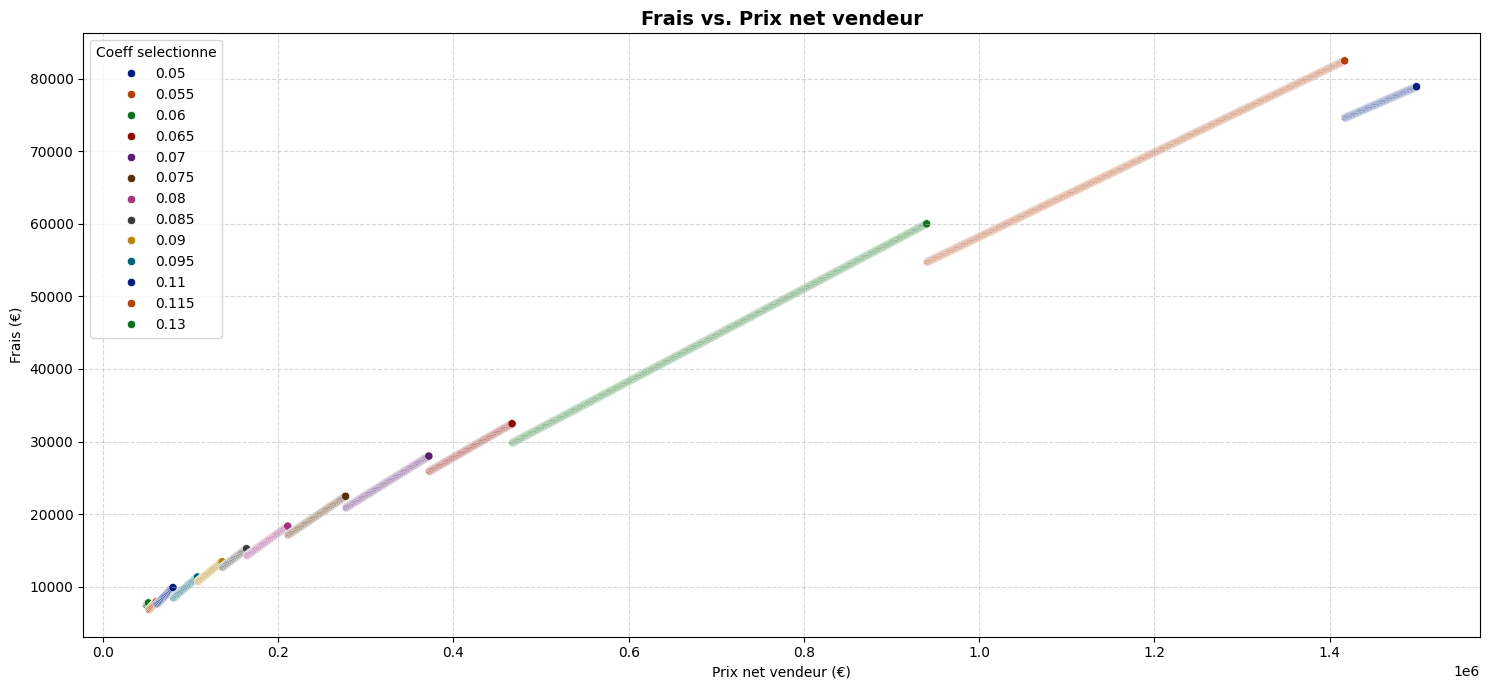

In [71]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_analyse, x = 'Prix net vendeur', y= 'Frais', hue='Coeff selectionne', palette='dark')
plt.title('Frais vs. Prix net vendeur', fontsize=14, weight='bold')
plt.xlabel('Prix net vendeur (€)')
plt.ylabel('Frais (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

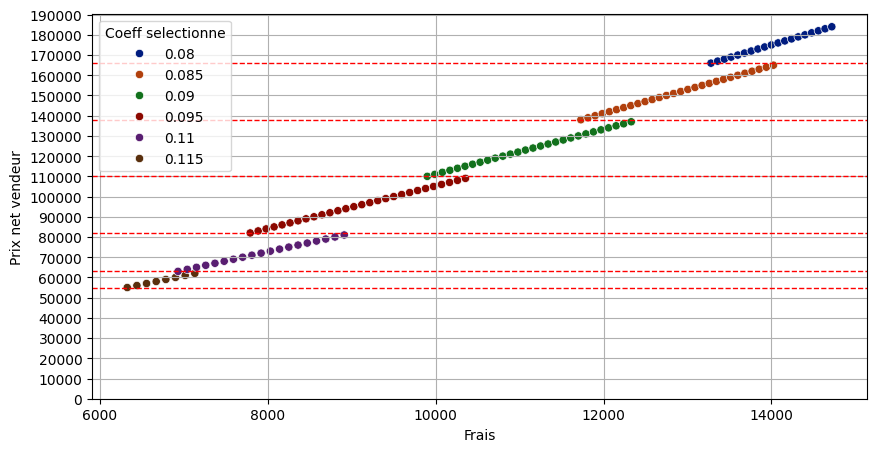

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Frais' , y = 'Prix net vendeur', hue= 'Coeff selectionne', palette='dark' )
for seuil_n in coeff_lim_lst_n:
    plt.axhline(y=seuil_n, color='red', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, df_analyse['Prix net vendeur'].max() + 10000, 10000))
plt.grid(True)

In [74]:
df_analyse

,Prix net vendeur,Coeff selectionne,Prix de vente,Frais,prix_coeff_lim
0,50000,0.130,5.747126e+04,7471.264368,True
1,51000,0.130,5.862069e+04,7620.689655,False
2,52000,0.130,5.977011e+04,7770.114943,False
3,53000,0.115,5.988701e+04,6887.005650,True
4,54000,0.115,6.101695e+04,7016.949153,False
...,...,...,...,...,...
1445,1495000,0.050,1.573684e+06,78684.210526,False
1446,1496000,0.050,1.574737e+06,78736.842105,False
1447,1497000,0.050,1.575789e+06,78789.473684,False
1448,1498000,0.050,1.576842e+06,78842.105263,False
